# PDE
$\frac{\partial}{\partial t}U(t, x) -\mu\frac{\partial^2}{\partial x^2}U(t, x)=0$

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# First order expansion

$\frac{0.5}{dt}(u_{t + 1, x} - u_{t - 1, x}) - \frac{\mu}{dx^2}(u_{t, x + 1} - 2u_{t, x} + u_{t, x + 1}) = 0$

$\Rightarrow u_{t + 1, x} = \frac{2\mu dt}{dx^2}(u_{t, x + 1} - 2u_{t, x} + u_{t, x + 1}) + u_{t - 1, x}$

For first iteration, $u_{t - 1, x}$ is unreachable, we need to use backyard methode of first order

$\frac{1}{dt}(u_{t + 1, x} - u_{t, x}) - \frac{\mu}{dx^2}(u_{t, x + 1} - 2u_{t, x} + u_{t, x + 1}) = 0$

$\Rightarrow u_{t + 1, x} = \frac{\mu dt}{dx^2}(u_{t, x + 1} - 2u_{t, x} + u_{t, x + 1}) + u_{t, x}$

And for $u_{t, 0}$, $u_{t, X}$ we use forward and backyard methode on second order

$\Rightarrow u_{t + 1, 0} = \frac{\mu dt}{dx^2}(4u_{t, 0} - 10u_{t, 1} + 8u_{t, 2} - 2 u_{t, 3}) + u_{t - 1, 0}$

$\Rightarrow u_{t + 1, X} = \frac{\mu dt}{dx^2}(4u_{t, X} - 10u_{t, X - 1} + 8u_{t, X - 2} - 2 u_{t, X - 3}) + u_{t - 1, X}$


In [2]:
# Initials conditions

mu = 0.5

x_min = 0
x_max = 3 * np.pi
dx = 0.1
x_axes = np.arange(x_min, x_max, dx)

u0 = np.sin(x_axes)

t0 = 0
dt = 0.1
T = 20

In [3]:
# Bondary conditions

def bound(u):
    return u

In [4]:
un = bound(u0)
u_prim = []
states = [un]

# Fast calc
over_dx = 1 / dx
over_dx2 = 1 / dx ** 2
dt_over_dx = dt / dx
dt_over_dx2 = dt / dx ** 2


def derive_t0(u):
    u = mu * dt_over_dx2 * (np.roll(u, 1) - 2 * u + np.roll(u, - 1)) + u
    #u[0] = mu * dt_over_dx2 * (2 * u[0] - 5 * u[1] + 4 * u[2] - u[3]) + u[0]
    #u[-1] = mu * dt_over_dx2 * (2 * u[-1] - 5 * u[-2] + 4 * u[-3] - u[-4]) + u[-1]
    return u

def derive(states, i):
    u = states[i - 1]
    ul = states[i - 2]
    u = 2 * mu * dt_over_dx2 *  (np.roll(u, 1) - 2 * u + np.roll(u, - 1)) + ul
    #u[0] = 2 * mu * dt_over_dx2 * (2 * u[0] - 5 * u[1] + 4 * u[2] - u[3]) + ul[0]
    #u[-1] = 2 * mu * dt_over_dx2 * (2 * u[-1] - 5 * u[-2] + 4 * u[-3] - u[-4]) + ul[-1]
    return u


for i, t in enumerate(np.arange(t0, T, dt), start=1):
    if i == 1:  # t0 - 1 inexistant
        un = bound(derive_t0(un))
    else:
        un = bound(derive(states, i))
    u_prim.append(un - states[-1])
    states.append(un)



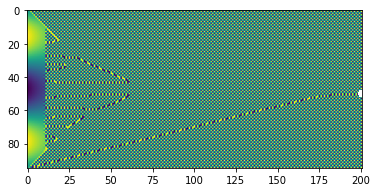

In [5]:
image_array = np.vstack(states).T
_ = plt.imshow(np.clip(image_array, -1, 1)) 